In [1]:
#Starter File 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from datetime import datetime
from scipy.stats import linregress
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
sp_500_div_yield_month = "S&P_500_div_yield_month.csv"
us_yield_curve = "US_Yield_Curve.csv"
sp_500_1m_futures = "S&P_500_1M_Futures.csv"

sp_500_div_yield_month = pd.read_csv(sp_500_div_yield_month)
us_yield_curve = pd.read_csv(us_yield_curve)
sp_500_1m_futures = pd.read_csv(sp_500_1m_futures)

sp_500_div_yield_month_df = pd.DataFrame(sp_500_div_yield_month)
us_yield_curve_df = pd.DataFrame(us_yield_curve)
sp_500_1m_futures_df = pd.DataFrame(sp_500_1m_futures)

print(sp_500_div_yield_month_df.shape)
print(us_yield_curve_df.shape)
print(sp_500_1m_futures_df.shape)

sp_500_1m_futures_df.head(5)

(1792, 2)
(7560, 13)
(9545, 9)


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,3/19/2020,NaN,NaN,NaN,NaN,10.7,2403.3,4764,108057
1,3/18/2020,NaN,NaN,NaN,NaN,81.5,2414.0,5300,108108
2,3/17/2020,NaN,NaN,NaN,NaN,79.3,2495.5,10460,109967
3,3/16/2020,NaN,NaN,NaN,NaN,279.7,2416.2,10105,107994
4,3/13/2020,2614.0,2703.0,2490.0,2695.0,227.0,2695.9,13217,107183


In [3]:
sp_500_futures_vs_div_df = pd.merge(sp_500_1m_futures, sp_500_div_yield_month, on="Date", how="outer")
sp_500_futures_vs_div_df = pd.merge(sp_500_futures_vs_div_df, us_yield_curve_df, on="Date", how="outer")

sp_500_futures_vs_div_df = pd.DataFrame({
    "Date": sp_500_futures_vs_div_df["Date"],
    "S&P 500 Close Price": sp_500_futures_vs_div_df["Last"],
    "S&P 500 Dividend Yield": sp_500_futures_vs_div_df["Value"],
    "US Treasury Yield": sp_500_futures_vs_div_df["10 YR"]
})

print(sp_500_futures_vs_div_df.shape)
sp_500_futures_vs_div_df.head(5)

(11043, 4)


,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield
0,3/19/2020,NaN,NaN,1.12
1,3/18/2020,NaN,NaN,1.18
2,3/17/2020,NaN,NaN,1.02
3,3/16/2020,NaN,NaN,0.73
4,3/13/2020,2695.0,NaN,0.94


In [4]:
sp_500_futures_vs_div_df_sorted = sp_500_futures_vs_div_df.sort_index(axis=0,ascending=False)
sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield
11042,9/1/1993,NaN,NaN,5.46
11041,4/5/1996,NaN,NaN,6.57
11040,4/2/1999,NaN,NaN,5.20
11039,9/13/2001,NaN,NaN,4.64
11038,9/14/2001,NaN,NaN,4.57


In [5]:
sp_500_futures_vs_div_df_sorted.dtypes

Date                       object
S&P 500 Close Price       float64
S&P 500 Dividend Yield    float64
US Treasury Yield         float64
dtype: object

In [6]:
sp_500_futures_vs_div_df_sorted["Date"] = pd.to_datetime(sp_500_futures_vs_div_df_sorted["Date"])
sp_500_futures_vs_div_df_sorted.dtypes

Date                      datetime64[ns]
S&P 500 Close Price              float64
S&P 500 Dividend Yield           float64
US Treasury Yield                float64
dtype: object

In [7]:
#column_value = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["S&P 500 Close Price"] == 0].index
#sp_500_futures_vs_div_df_sorted.drop(column_value, inplace=True)
#sp_500_futures_vs_div_df_sorted.dropna(subset=[2])

sp_500_futures_vs_div_df_sorted = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["S&P 500 Close Price"].notna()]
column_value = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["Date"] < "1990-01-31"].index
sp_500_futures_vs_div_df_sorted.drop(column_value, inplace=True)
sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield
7576,1990-01-31,330.50,3.28,8.43
7575,1990-02-01,330.10,NaN,8.42
7574,1990-02-02,332.50,NaN,8.50
7573,1990-02-05,333.40,NaN,8.53
7572,1990-02-06,330.25,NaN,8.57


In [8]:
#sp_500_futures_vs_div_df_sorted.head(50)
#sp_500_futures_vs_div_df_sorted.to_csv("spandspdiv.csv")

In [9]:
total_yield_list = []
#close_price_list = []
dollar_yield_list = []

for index, row in sp_500_futures_vs_div_df_sorted.iterrows():
    price_row = row["S&P 500 Close Price"]
    yield_row = row["S&P 500 Dividend Yield"]
    #print(price_row, yield_row)
    if yield_row > 0:
        total_yield_list.append(round(yield_row, 2))
        current_yield = yield_row
        dollar_yield = (current_yield / 100) * price_row
        dollar_yield_list.append(round(dollar_yield, 2))
    else:
        percent_yield = dollar_yield / price_row *100
        total_yield_list.append(round(percent_yield, 2))
    
    
    
#print(total_yield_list)
#print(dollar_yield_list)

print(len(total_yield_list))
        

7563


In [10]:
sp_500_futures_vs_div_df_sorted["S&P 500 Dividend Yield"] = total_yield_list

sp500_percent_return = []
sp500_div_yield_return = []
treas_yield_return = []

previous_price = 325.20
previous_div_yield = 3.28
previous_treas_yield = 8.51

for index, row in sp_500_futures_vs_div_df_sorted.iterrows():
    price_row = row["S&P 500 Close Price"]
    div_yield_row = row["S&P 500 Dividend Yield"]
    treas_yield_row = row["US Treasury Yield"]
    
    daily_return_sp500 = (price_row - previous_price) / previous_price * 100
    sp500_percent_return.append(round(daily_return_sp500, 2))
    previous_price = price_row
    
    daily_return_div_yield = (div_yield_row - previous_div_yield) / previous_div_yield * 100
    sp500_div_yield_return.append(round(daily_return_div_yield, 2))
    previous_div_yield = div_yield_row
    
    daily_return_treas_yield = (treas_yield_row - previous_treas_yield) / previous_treas_yield * 100
    treas_yield_return.append(round(daily_return_treas_yield, 2))
    previous_treas_yield = treas_yield_row

print(len(sp500_percent_return))
print(len(sp500_div_yield_return))
print(len(treas_yield_return))

7563
7563
7563


In [11]:
sp_500_futures_vs_div_df_sorted["S&P 500 Dividend Yield"] = total_yield_list

sp_500_futures_vs_div_df_sorted.insert(2, "S&P 500 % Return", sp500_percent_return)
sp_500_futures_vs_div_df_sorted.insert(4, "Div Yield % Return", sp500_div_yield_return)
sp_500_futures_vs_div_df_sorted.insert(6, "Treasury Yield % Return", treas_yield_return)

sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 % Return,S&P 500 Dividend Yield,Div Yield % Return,US Treasury Yield,Treasury Yield % Return
7576,1990-01-31,330.50,1.63,3.28,0.00,8.43,-0.94
7575,1990-02-01,330.10,-0.12,3.28,0.00,8.42,-0.12
7574,1990-02-02,332.50,0.73,3.26,-0.61,8.50,0.95
7573,1990-02-05,333.40,0.27,3.25,-0.31,8.53,0.35
7572,1990-02-06,330.25,-0.94,3.28,0.92,8.57,0.47


In [12]:
#sp_500_futures_vs_div_df_sorted = pd.merge(sp_500_futures_vs_div_df_sorted, us_yield_curve_df, on="Date", how="inner")
#sp_500_futures_vs_div_df_sorted.head()

In [13]:
analyze_dates_df = sp_500_futures_vs_div_df_sorted.loc[(sp_500_futures_vs_div_df_sorted["Date"] >= "2007-10-01") 
                                               & (sp_500_futures_vs_div_df_sorted["Date"] <= "2009-03-20")]
#yields_monthly_2008_df = yields_monthly_df.loc[yields_monthly_df["Date"] <= "2000-07-31", :]
analyze_dates_df.head(5)

,Date,S&P 500 Close Price,S&P 500 % Return,S&P 500 Dividend Yield,Div Yield % Return,US Treasury Yield,Treasury Yield % Return
3125,2007-10-01,1556.6,1.20,1.75,-1.13,4.56,-0.65
3124,2007-10-02,1554.6,-0.13,1.75,0.00,4.54,-0.44
3123,2007-10-03,1550.7,-0.25,1.75,0.00,4.55,0.22
3122,2007-10-04,1552.2,0.10,1.75,0.00,4.54,-0.22
3121,2007-10-05,1570.7,1.19,1.73,-1.14,4.65,2.42


In [14]:
sp500_tot_ret = []
sp500_divyld_tot_ret = []
treas_yld_tot_ret = []
treas_less_divyld_tot_ret = []

start_price = analyze_dates_df["S&P 500 Close Price"].iloc[0]
start_div_yield = analyze_dates_df["S&P 500 Dividend Yield"].iloc[0]
start_treas_yield = analyze_dates_df["US Treasury Yield"].iloc[0]

for index, row in analyze_dates_df.iterrows():
    price_row = row["S&P 500 Close Price"]
    div_yield_row = row["S&P 500 Dividend Yield"]
    treas_yield_row = row["US Treasury Yield"]
    
    tot_ret_sp500 = (price_row - start_price) / start_price * 100
    sp500_tot_ret.append(round(tot_ret_sp500, 2))
    
    tot_ret_div_yld = (div_yield_row - start_div_yield) / start_div_yield * 100
    sp500_divyld_tot_ret.append(round(tot_ret_div_yld, 2))
    
    tot_ret_treas_yield = (treas_yield_row - start_treas_yield) / start_treas_yield * 100
    treas_yld_tot_ret.append(round(tot_ret_treas_yield, 2))
    
    treas_less_divyld = tot_ret_treas_yield - tot_ret_div_yld
    treas_less_divyld_tot_ret.append(round(treas_less_divyld, 2))

#print((sp500_tot_ret))
#print((sp500_divyld_tot_ret))
#print((treas_yld_tot_ret))

print(start_price)
print(start_div_yield)
print(start_treas_yield)

1556.6
1.75
4.56


In [15]:
analyze_metrics_df = pd.DataFrame({
    "Date": analyze_dates_df["Date"],
    "S&P 500 Close Price": analyze_dates_df["S&P 500 Close Price"],
    "S&P 500 Dividend Yield": analyze_dates_df["S&P 500 Dividend Yield"],
    "US Treasury Yield": analyze_dates_df["US Treasury Yield"],
    "Treas Yld - Div Yld": analyze_dates_df["US Treasury Yield"] - analyze_dates_df["S&P 500 Dividend Yield"],
    "S&P 500 Total Return": sp500_tot_ret,
    "S&P 500 DivYld Total Return": sp500_divyld_tot_ret,
    "Treasury Yld Total Return": treas_yld_tot_ret,
    "Treas Yld Tot Ret - Div Yld Tot Ret": treas_less_divyld_tot_ret,
    "S&P 500 Daily Return": analyze_dates_df["S&P 500 % Return"],
    "S&P 500 Dividend Yield Daily Return": analyze_dates_df["Div Yield % Return"],
    "US Treasury Yield Daily Return": analyze_dates_df["Treasury Yield % Return"],
    "Treas Yld Daily Return - Div Yld Daily Return": analyze_dates_df["Treasury Yield % Return"] - analyze_dates_df["Div Yield % Return"]
})

#analyze_dates_df["S&P 500 Total Return"] = sp500_tot_ret
#analyze_dates_df["S&P 500 DivYld Total Return"] = sp500_divyld_tot_ret
#analyze_dates_df["Treasury Yld Total Return"] = treas_yld_tot_ret
#analyze_dates_df["T-Yield less Div-Yield"] = analyze_dates_df["Treasury Yld Total Return"] - analyze_dates_df["S&P 500 DivYld Total Return"]
#analyze_dates_df.head()

print(analyze_metrics_df.isnull().sum())
print(analyze_metrics_df.shape)

analyze_metrics_df.head(50)



Date                                             0
S&P 500 Close Price                              0
S&P 500 Dividend Yield                           0
US Treasury Yield                                4
Treas Yld - Div Yld                              4
S&P 500 Total Return                             0
S&P 500 DivYld Total Return                      0
Treasury Yld Total Return                        4
Treas Yld Tot Ret - Div Yld Tot Ret              4
S&P 500 Daily Return                             0
S&P 500 Dividend Yield Daily Return              0
US Treasury Yield Daily Return                   8
Treas Yld Daily Return - Div Yld Daily Return    8
dtype: int64
(363, 13)


,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield,Treas Yld - Div Yld,S&P 500 Total Return,S&P 500 DivYld Total Return,Treasury Yld Total Return,Treas Yld Tot Ret - Div Yld Tot Ret,S&P 500 Daily Return,S&P 500 Dividend Yield Daily Return,US Treasury Yield Daily Return,Treas Yld Daily Return - Div Yld Daily Return
3125,2007-10-01,1556.6,1.75,4.56,2.81,0.00,0.00,0.00,0.00,1.20,-1.13,-0.65,0.48
3124,2007-10-02,1554.6,1.75,4.54,2.79,-0.13,0.00,-0.44,-0.44,-0.13,0.00,-0.44,-0.44
3123,2007-10-03,1550.7,1.75,4.55,2.80,-0.38,0.00,-0.22,-0.22,-0.25,0.00,0.22,0.22
3122,2007-10-04,1552.2,1.75,4.54,2.79,-0.28,0.00,-0.44,-0.44,0.10,0.00,-0.22,-0.22
3121,2007-10-05,1570.7,1.73,4.65,2.92,0.91,-1.14,1.97,3.12,1.19,-1.14,2.42,3.56
3120,2007-10-08,1562.7,1.74,NaN,NaN,0.39,-0.57,NaN,NaN,-0.51,0.58,NaN,NaN
3119,2007-10-09,1576.2,1.72,4.67,2.95,1.26,-1.71,2.41,4.13,0.86,-1.15,NaN,NaN
3118,2007-10-10,1573.3,1.73,4.65,2.92,1.07,-1.14,1.97,3.12,-0.18,0.58,-0.43,-1.01
3117,2007-10-11,1565.2,1.74,4.66,2.92,0.55,-0.57,2.19,2.76,-0.51,0.58,0.22,-0.36
3116,2007-10-12,1574.6,1.73,4.70,2.97,1.16,-1.14,3.07,4.21,0.60,-0.57,0.86,1.43


In [16]:
analyze_metrics_df.dropna(inplace=True)
print(analyze_metrics_df.isnull().sum())
print(analyze_metrics_df.shape)

analyze_metrics_df.head(5)

Date                                             0
S&P 500 Close Price                              0
S&P 500 Dividend Yield                           0
US Treasury Yield                                0
Treas Yld - Div Yld                              0
S&P 500 Total Return                             0
S&P 500 DivYld Total Return                      0
Treasury Yld Total Return                        0
Treas Yld Tot Ret - Div Yld Tot Ret              0
S&P 500 Daily Return                             0
S&P 500 Dividend Yield Daily Return              0
US Treasury Yield Daily Return                   0
Treas Yld Daily Return - Div Yld Daily Return    0
dtype: int64
(355, 13)


,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US Treasury Yield,Treas Yld - Div Yld,S&P 500 Total Return,S&P 500 DivYld Total Return,Treasury Yld Total Return,Treas Yld Tot Ret - Div Yld Tot Ret,S&P 500 Daily Return,S&P 500 Dividend Yield Daily Return,US Treasury Yield Daily Return,Treas Yld Daily Return - Div Yld Daily Return
3125,2007-10-01,1556.6,1.75,4.56,2.81,0.00,0.00,0.00,0.00,1.20,-1.13,-0.65,0.48
3124,2007-10-02,1554.6,1.75,4.54,2.79,-0.13,0.00,-0.44,-0.44,-0.13,0.00,-0.44,-0.44
3123,2007-10-03,1550.7,1.75,4.55,2.80,-0.38,0.00,-0.22,-0.22,-0.25,0.00,0.22,0.22
3122,2007-10-04,1552.2,1.75,4.54,2.79,-0.28,0.00,-0.44,-0.44,0.10,0.00,-0.22,-0.22
3121,2007-10-05,1570.7,1.73,4.65,2.92,0.91,-1.14,1.97,3.12,1.19,-1.14,2.42,3.56


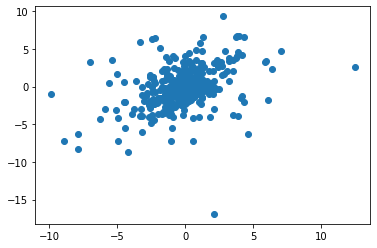

0.3887679542446993


In [17]:
plt.scatter(analyze_metrics_df["S&P 500 Daily Return"], analyze_metrics_df["US Treasury Yield Daily Return"])
plt.show()
correlation = st.pearsonr(analyze_metrics_df["S&P 500 Daily Return"], analyze_metrics_df["US Treasury Yield Daily Return"])[0]
print(correlation)

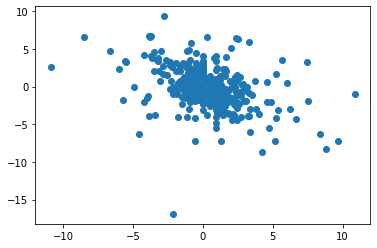

-0.3866855157905039


In [18]:
plt.scatter(analyze_metrics_df["S&P 500 Dividend Yield Daily Return"], analyze_metrics_df["US Treasury Yield Daily Return"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 Dividend Yield Daily Return"], analyze_metrics_df["US Treasury Yield Daily Return"])[0]
print(correlation)

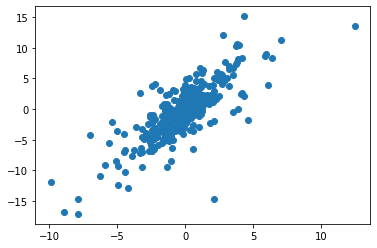

0.7921949098862953


In [19]:
plt.scatter(analyze_metrics_df["S&P 500 Daily Return"], analyze_metrics_df["Treas Yld Daily Return - Div Yld Daily Return"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 Daily Return"], analyze_metrics_df["Treas Yld Daily Return - Div Yld Daily Return"])[0]
print(correlation)

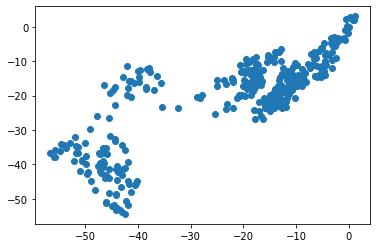

0.8093908096442142


In [20]:
plt.scatter(analyze_metrics_df["S&P 500 Total Return"], analyze_metrics_df["Treasury Yld Total Return"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 Total Return"], analyze_metrics_df["Treasury Yld Total Return"])[0]
print(correlation)

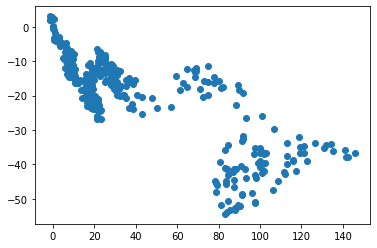

-0.804521760813094


In [21]:
plt.scatter(analyze_metrics_df["S&P 500 DivYld Total Return"], analyze_metrics_df["Treasury Yld Total Return"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 DivYld Total Return"], analyze_metrics_df["Treasury Yld Total Return"])[0]
print(correlation)

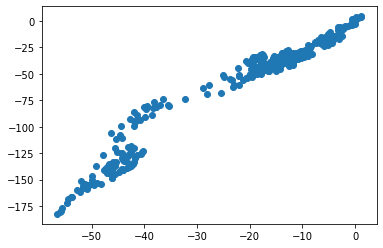

0.9761323057467218


In [22]:
plt.scatter(analyze_metrics_df["S&P 500 Total Return"], analyze_metrics_df["Treas Yld Tot Ret - Div Yld Tot Ret"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 Total Return"], analyze_metrics_df["Treas Yld Tot Ret - Div Yld Tot Ret"])[0]
print(correlation)

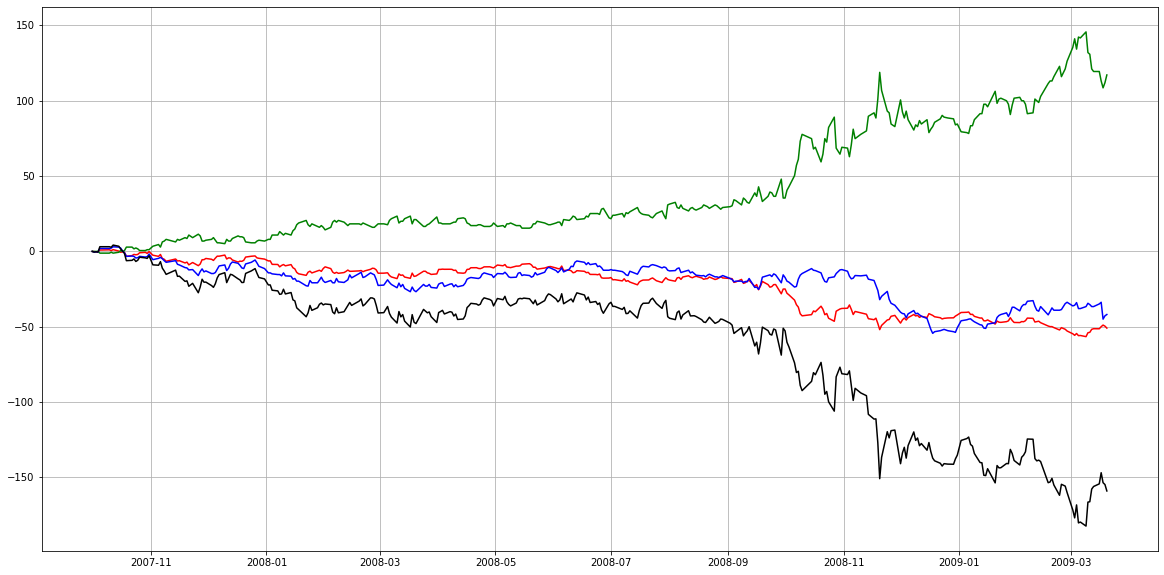

In [23]:
fig = plt.figure(figsize=(20,10))
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 Total Return"], "r-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 DivYld Total Return"], "g-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["Treasury Yld Total Return"], "b-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["Treas Yld Tot Ret - Div Yld Tot Ret"], "k-")
plt.grid(alpha=3)
plt.show()

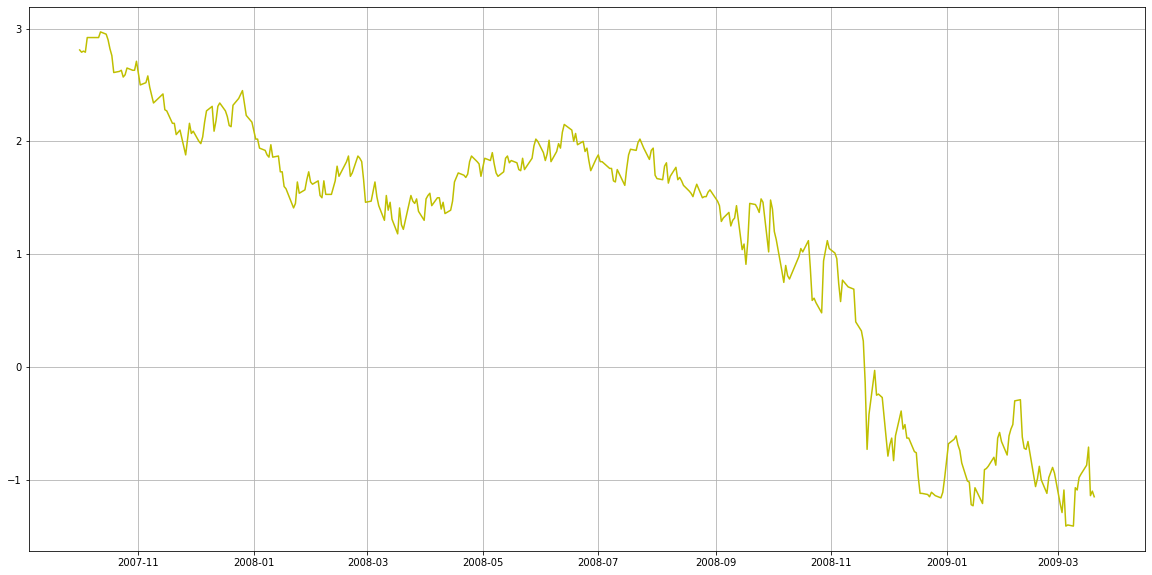

In [24]:
fig = plt.figure(figsize=(20,10))
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["Treas Yld - Div Yld"], "y-")
plt.grid(alpha=3)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'x'

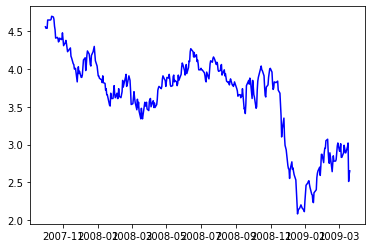

In [25]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["US Treasury Yield"], "b-")
plt.x
plt.ylabel("US Treasury Yield")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 Close Price"], "g-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("S&P 500 Price")



ax1.legend((line1+line2), ("Price", "Dividend"), loc=0)
#plt.legend((line1, line2), ("Price", "Yield"), loc="upper left")
plt.show()

